<a href="https://colab.research.google.com/github/Christoputhanpurackal/machine-learning/blob/main/diabetes_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix

In [ ]:
data=pd.read_csv('/content/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.shape

(768, 9)

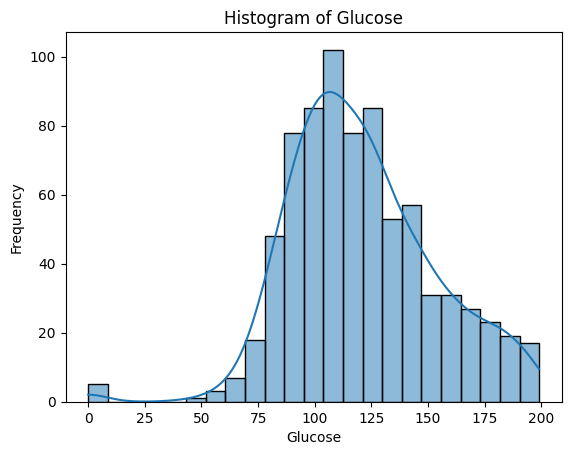

In [ ]:
sns.histplot(data['Glucose'],kde='True')
plt.title('Histogram of Glucose')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()



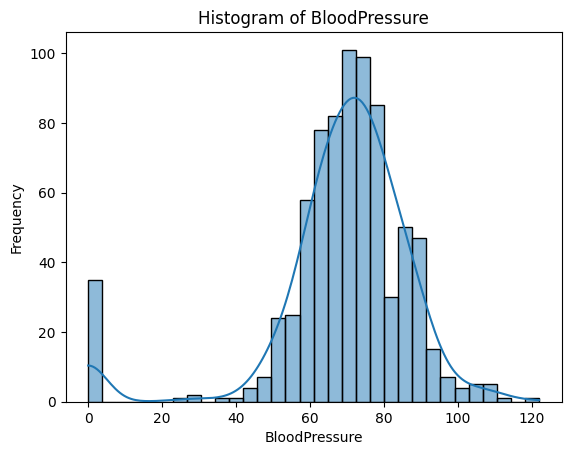

In [ ]:
sns.histplot(data['BloodPressure'],kde='True')
plt.title('Histogram of BloodPressure')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.show()

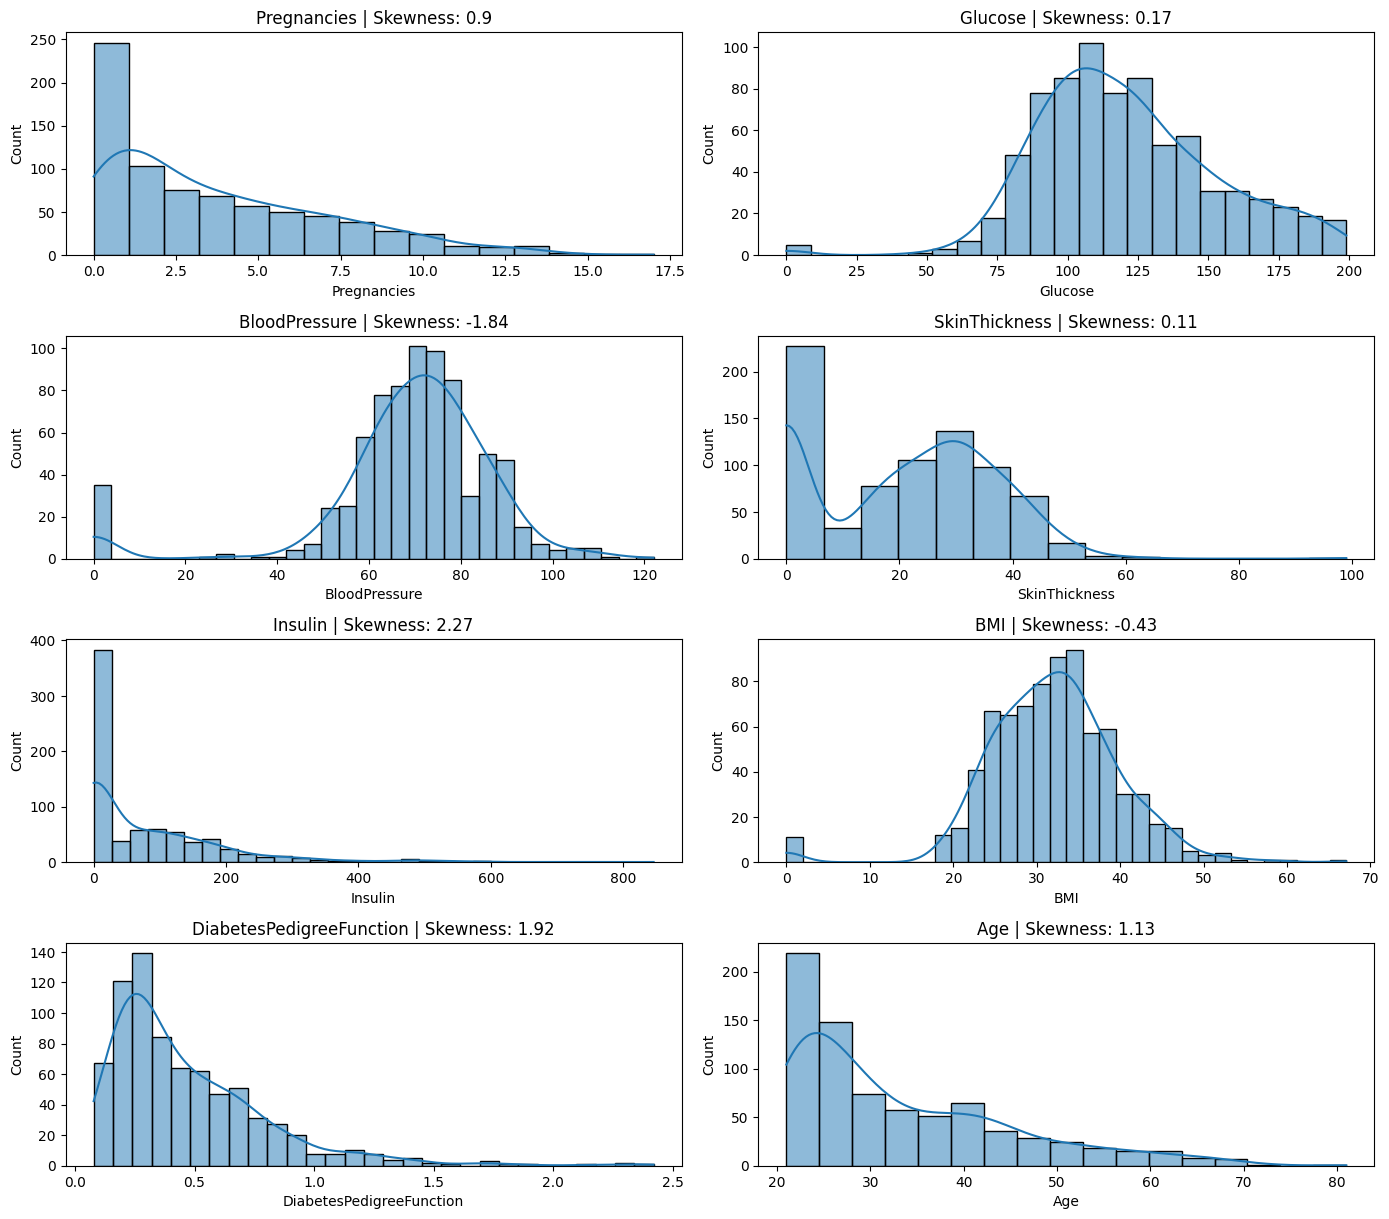

In [ ]:
#all atrributes at once
numerical_columns = data.iloc[:, :-1].columns


# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))

for idx, feature in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 2, idx+1)
    sns.histplot(data[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(data[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

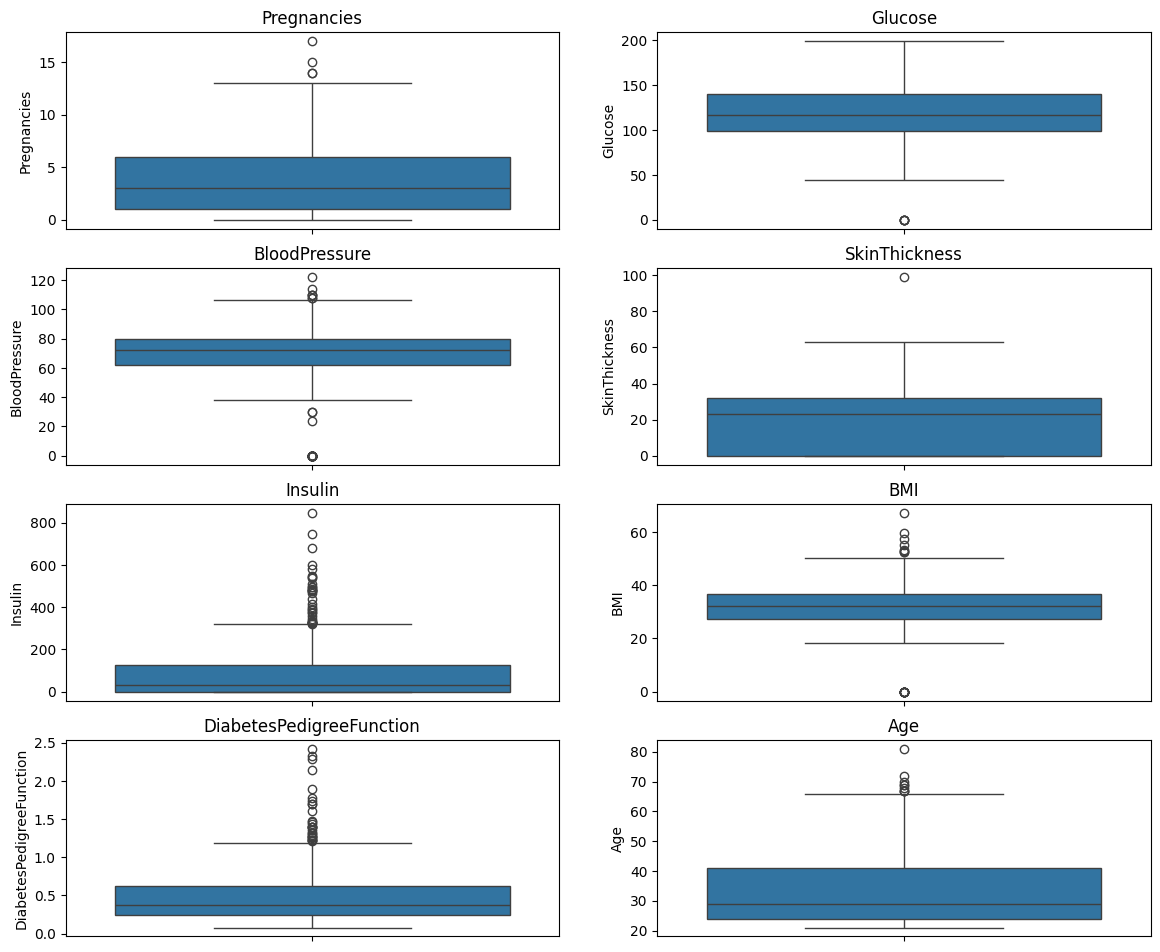

In [ ]:
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 2, idx+1)
    sns.boxplot(data[feature])
    plt.title(f"{feature}")
plt.show()

bivarient

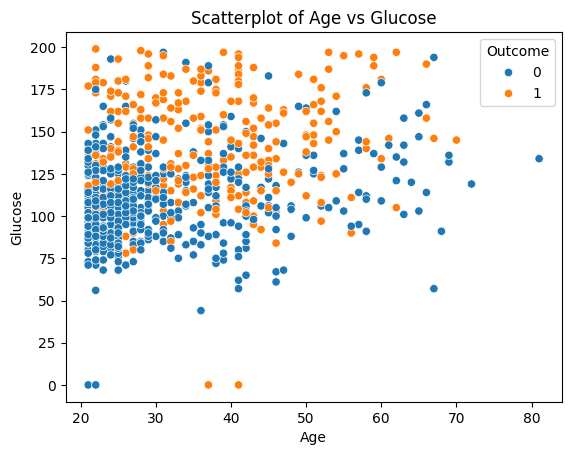

In [ ]:
sns.scatterplot(x='Age',y='Glucose',hue='Outcome',data=data)
plt.title('Scatterplot of Age vs Glucose')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.show()

<Figure size 1000x600 with 0 Axes>

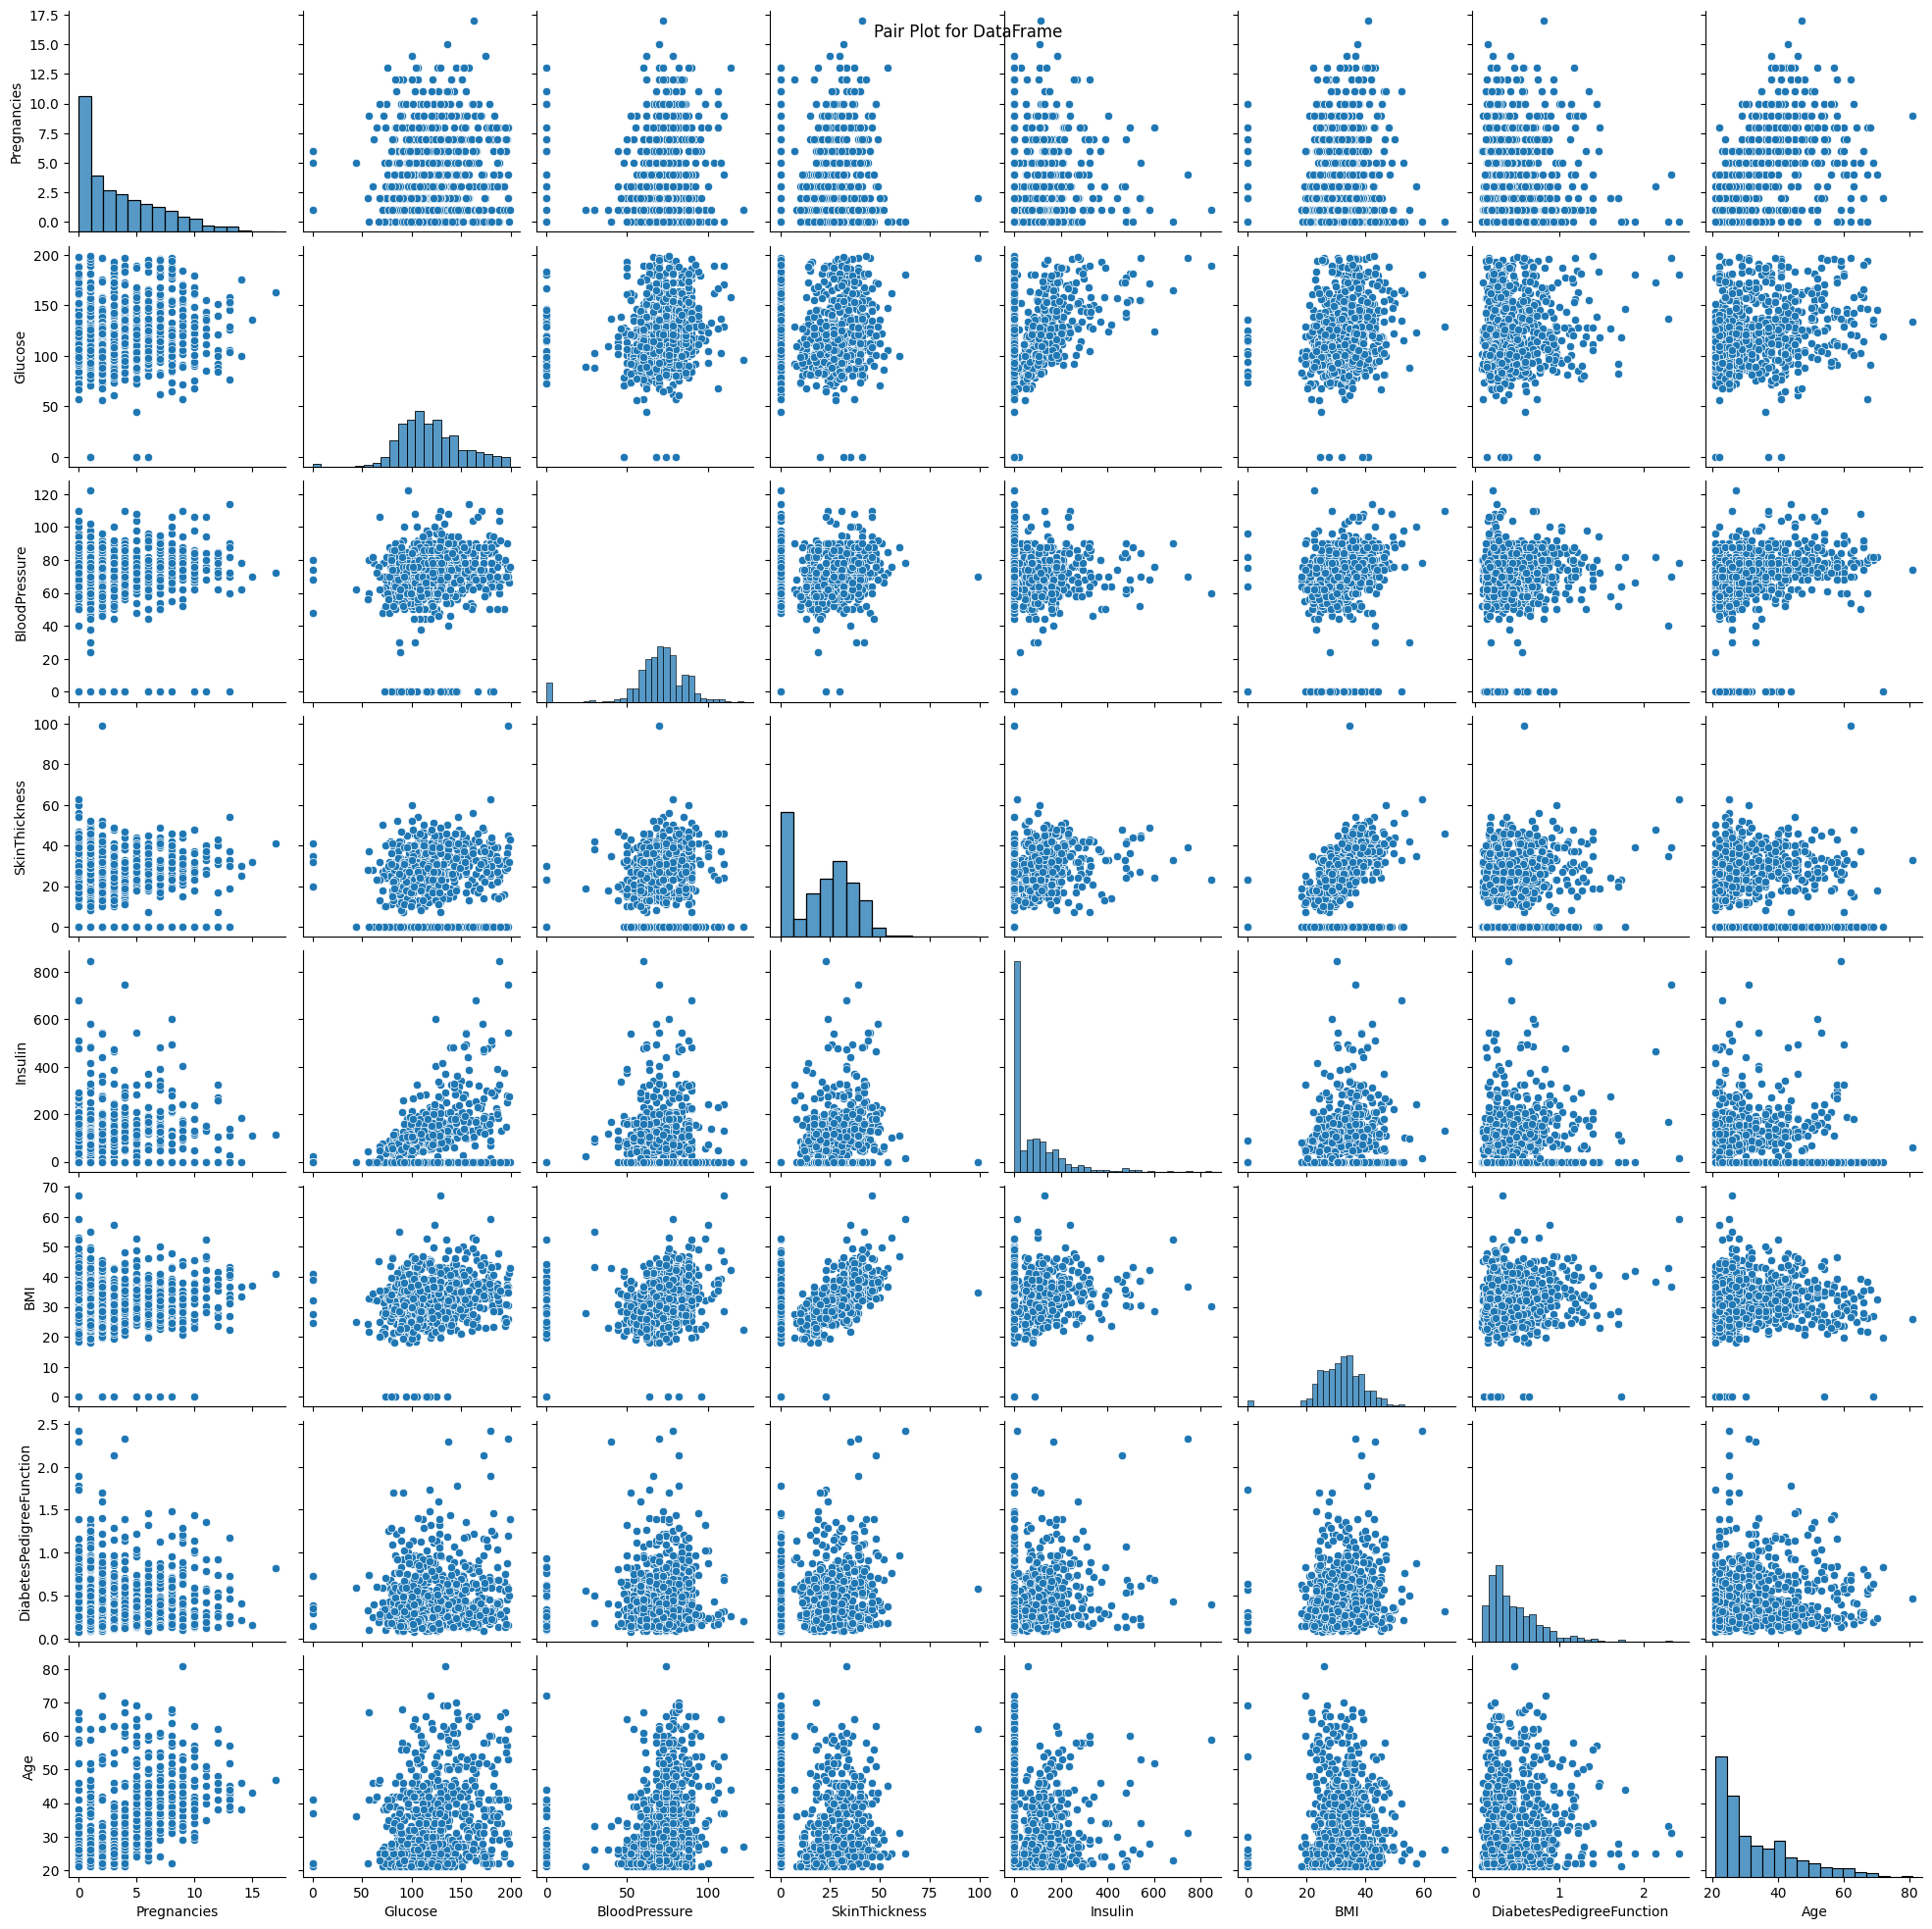

In [ ]:
col=data.iloc[:,:-1]
plt.figure(figsize=(10, 6))
sns.pairplot(col)
plt.suptitle('Pair Plot for DataFrame')
plt.show()

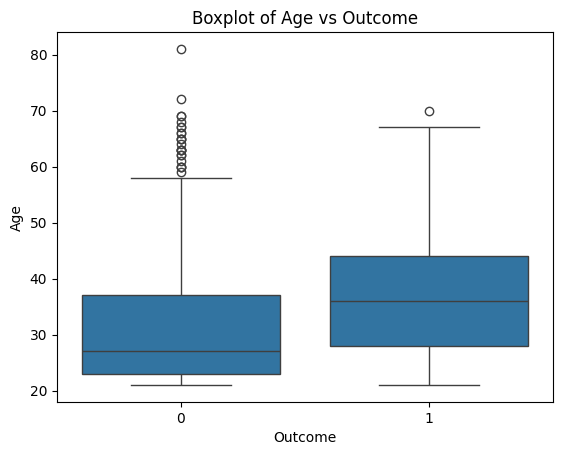

In [ ]:
sns.boxplot(x='Outcome',y='Age',data=data)
plt.title('Boxplot of Age vs Outcome')
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.show()

multivarient

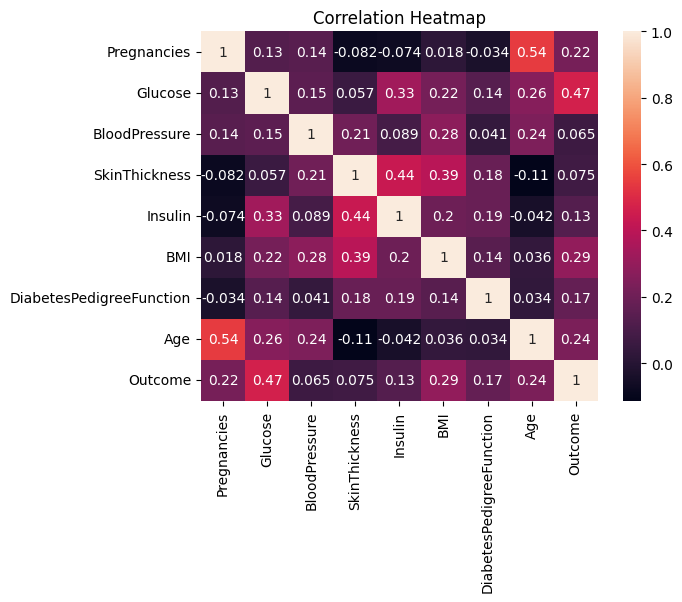

In [ ]:
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

outlier handling

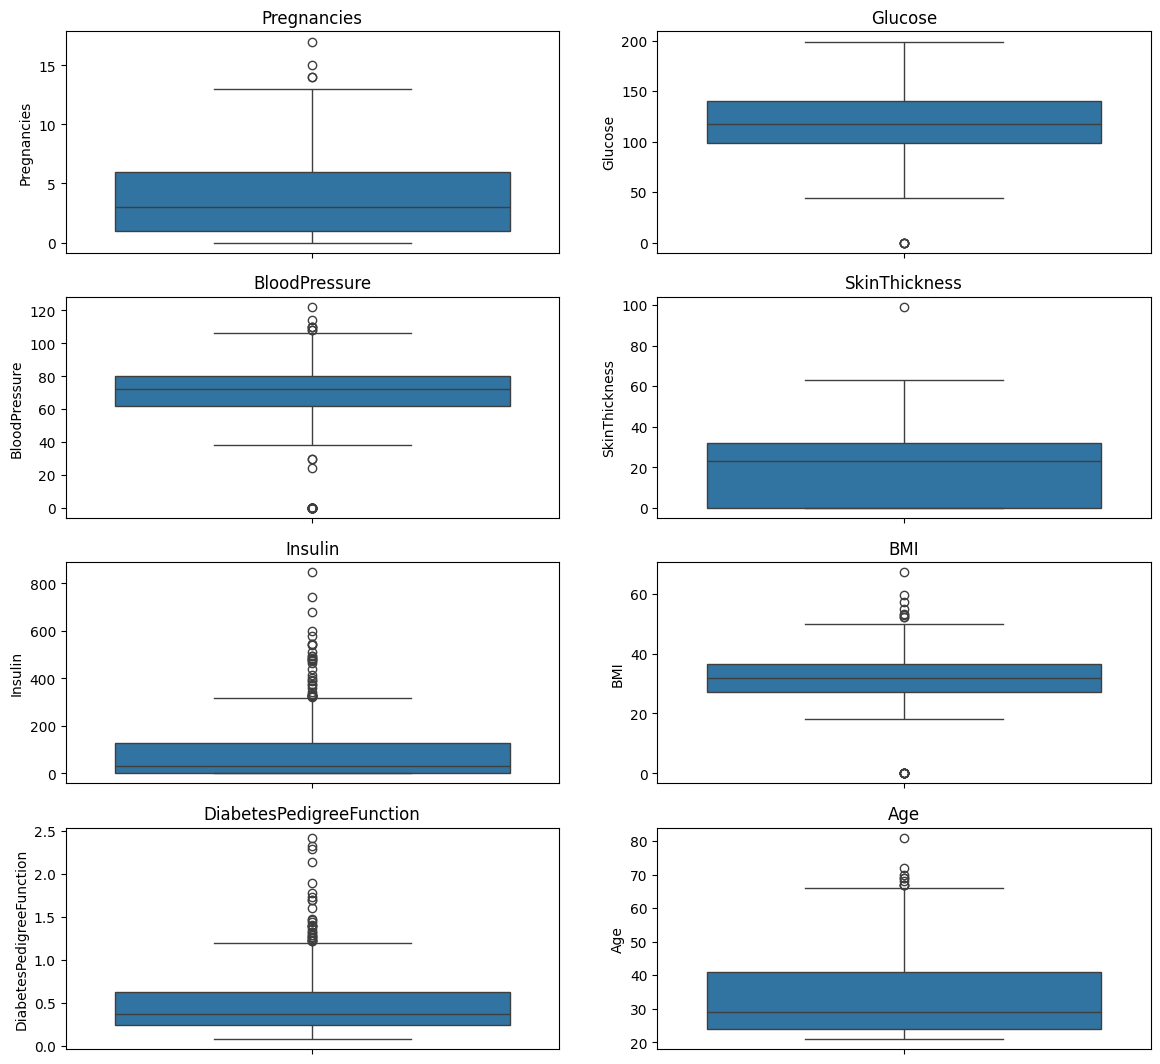

In [ ]:
out=data.columns
plt.figure(figsize=(14, len(out) * 3))
for idx, feature in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 2, idx+1)
    sns.boxplot(data[feature])
    plt.title(f"{feature}")
plt.show()

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1

In [ ]:

outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

In [ ]:

data[~outliers.any(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_capped = data.clip(lower=lower_bound, upper=upper_bound, axis=1)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'Insulin'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'DiabetesPedigreeFunction'),
  Text(7, 0, 'Age'),
  Text(8, 0, 'Outcome')])

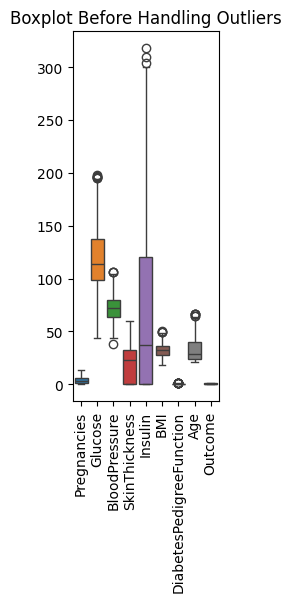

In [ ]:
plt.subplot(1, 3, 1)
sns.boxplot(data=data)
plt.title("Boxplot Before Handling Outliers")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'Insulin'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'DiabetesPedigreeFunction'),
  Text(7, 0, 'Age'),
  Text(8, 0, 'Outcome')])

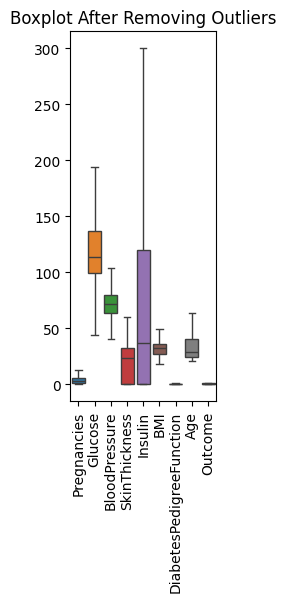

In [ ]:


plt.subplot(1, 3, 2)
sns.boxplot(data=data_capped)
plt.title("Boxplot After Removing Outliers")
plt.xticks(rotation=90)


In [ ]:
x = data.iloc[:, :-1]
y = data.iloc[:,-1]

In [ ]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7,150,78,29,126,35.2,0.692,54
118,4,97,60,23,0,28.2,0.443,22
247,0,165,90,33,680,52.3,0.427,23
157,1,109,56,21,135,25.2,0.833,23
468,8,120,0,0,0,30.0,0.183,38
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
192,7,159,66,0,0,30.4,0.383,36
629,4,94,65,22,0,24.7,0.148,21
559,11,85,74,0,0,30.1,0.300,35


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)

X_test_scaled = sc.transform(X_test)

In [ ]:
X_train_scaled

array([[0.41176471, 0.75757576, 0.63934426, ..., 0.52459016, 0.26216909,
        0.55      ],
       [0.23529412, 0.48989899, 0.49180328, ..., 0.42026826, 0.1558497 ,
        0.01666667],
       [0.        , 0.83333333, 0.73770492, ..., 0.77943368, 0.14901793,
        0.03333333],
       ...,
       [0.23529412, 0.47474747, 0.53278689, ..., 0.3681073 , 0.02988898,
        0.        ],
       [0.64705882, 0.42929293, 0.60655738, ..., 0.4485842 , 0.09479078,
        0.23333333],
       [0.29411765, 0.68686869, 0.67213115, ..., 0.        , 0.23996584,
        0.8       ]])

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print("accuracy",accuracy_score(y_test, y_pred))
print("recall",recall_score(y_test, y_pred))
print('precision',precision_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

accuracy 0.7792207792207793
recall 0.5531914893617021
precision 0.6666666666666666


array([[94, 13],
       [21, 26]])

In [ ]:
k_values = [i for i in range (1,20)]
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(np.mean(score))

In [ ]:
scores

[0.6660669065707051,
 0.6954418232706917,
 0.6759296281487407,
 0.6906037584966013,
 0.7085699053711847,
 0.7248300679728109,
 0.7199386911901906,
 0.7182460349193656,
 0.7150073304011728,
 0.7199120351859256,
 0.7248034119685458,
 0.7182593629214982,
 0.7150206584033054,
 0.7247900839664134,
 0.7166600026656005,
 0.726442756230841,
 0.7280687724910035,
 0.726442756230841,
 0.7248034119685459]

Text(0, 0.5, 'Accuracy Score')

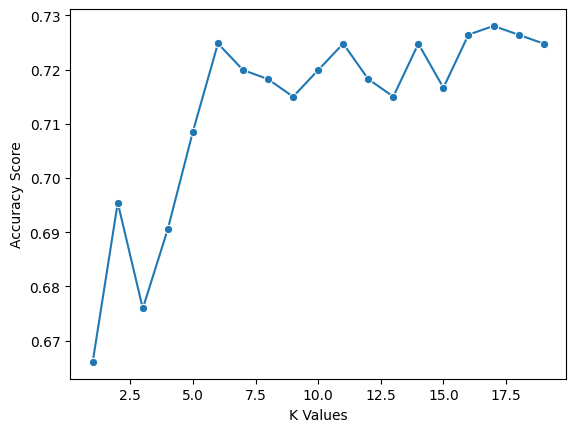

In [ ]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [ ]:
best_index = np.argmax(scores)
best_k = k_values[best_index]
best_k

17

In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [ ]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
confusion_matrix(y_test, y_pred)

Accuracy: 0.7857142857142857
Precision: 0.6842105263157895
Recall: 0.5531914893617021
F1 Score: 0.611764705882353


array([[95, 12],
       [21, 26]])

In [ ]:
from sklearn.svm import SVC

svm

In [ ]:
svc_linear = SVC(kernel='linear',C=100.0)
svc_linear.fit(X_train, y_train)

SVC(C=100.0, kernel='linear')

In [ ]:
y_pred_linear = svc_linear.predict(X_test)


accuracy = accuracy_score(y_test, y_pred_linear)
precision = precision_score(y_test, y_pred_linear)
recall = recall_score(y_test, y_pred_linear)
fscore = f1_score(y_test, y_pred_linear)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score: ",fscore)

Accuracy: 0.8051948051948052
Precision: 0.6808510638297872
Recall: 0.6808510638297872
F1 Score:  0.6808510638297872


Text(0.5, 1.0, 'confusion matrix')

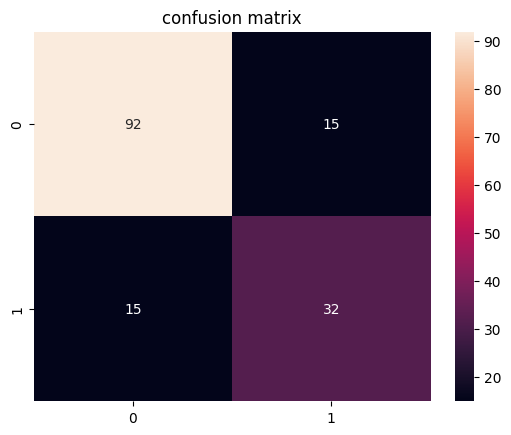

In [ ]:
cm = confusion_matrix(y_test,y_pred_linear)
sns.heatmap(cm, annot=True, fmt='d').set_title("confusion matrix")

In [ ]:
#polynomial Kernel
svc_poly = SVC(kernel='poly', degree=8)
svc_poly.fit(X_train, y_train)

SVC(degree=8, kernel='poly')

In [ ]:
y_pred_poly = svc_poly.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_poly)
precision = precision_score(y_test, y_pred_poly)
recall = recall_score(y_test, y_pred_poly)
fscore = f1_score(y_test, y_pred_poly)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score: ",fscore)

Accuracy: 0.7532467532467533
Precision: 0.6666666666666666
Recall: 0.3829787234042553
F1 Score:  0.4864864864864865


Text(0.5, 1.0, 'confusion matrix')

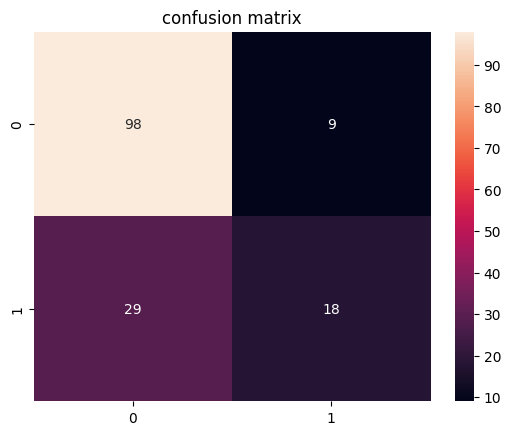

In [ ]:
cm = confusion_matrix(y_test,y_pred_poly)
sns.heatmap(cm, annot=True, fmt='d').set_title("confusion matrix")

In [ ]:
#Radial SVM or Gausian Kernel
svc_gaussian = SVC(kernel='rbf', gamma=0.1)
svc_gaussian.fit(X_train, y_train)

SVC(gamma=0.1)

In [ ]:
y_pred_gausian = svc_gaussian.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gausian)
precision = precision_score(y_test, y_pred_gausian)
recall = recall_score(y_test, y_pred_gausian)
fscore = f1_score(y_test, y_pred_gausian)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score: ",fscore)

Accuracy: 0.6948051948051948
Precision: 0.0
Recall: 0.0
F1 Score:  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Text(0.5, 1.0, 'confusion matrix')

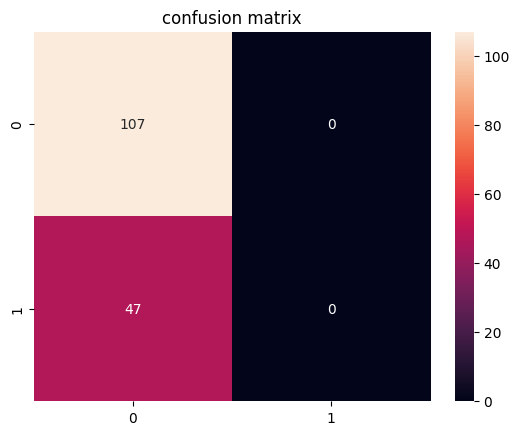

In [ ]:
cm = confusion_matrix(y_test,y_pred_gausian)
sns.heatmap(cm, annot=True, fmt='d').set_title("confusion matrix")

In [ ]:
#sigmoidal kernel
svc_sigmoid = SVC(kernel='sigmoid')
svc_sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [ ]:
y_pred_sigmoid = svc_sigmoid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_sigmoid)
precision = precision_score(y_test, y_pred_sigmoid)
recall = recall_score(y_test, y_pred_sigmoid)
fscore = f1_score(y_test, y_pred_sigmoid)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score: ",fscore)

Accuracy: 0.512987012987013
Precision: 0.15
Recall: 0.1276595744680851
F1 Score:  0.13793103448275862


Text(0.5, 1.0, 'confusion matrix')

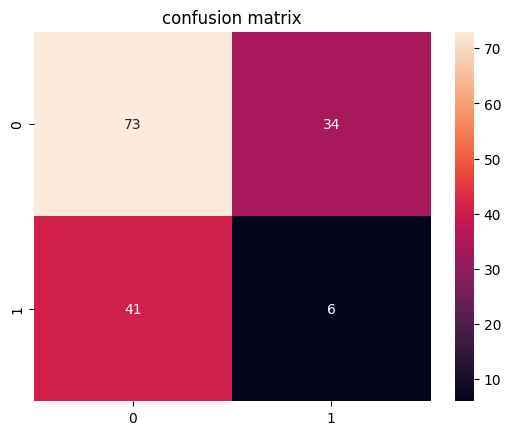

In [ ]:
cm = confusion_matrix(y_test,y_pred_sigmoid)
sns.heatmap(cm, annot=True, fmt='d').set_title("confusion matrix")

naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [ ]:
gaus_classifier = GaussianNB()
gaus_classifier.fit(X_train, y_train)

y_pred_gaus = gaus_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gaus)
precision = precision_score(y_test, y_pred_gaus)
recall = recall_score(y_test, y_pred_gaus)
fscore = f1_score(y_test, y_pred_gaus)

print("Accuracy:", accuracy)
print("Precision:", precision) #quality of positive prediction made by the model
print("Recall:", recall)
print("F1 Score: ",fscore)

Accuracy: 0.7922077922077922
Precision: 0.6744186046511628
Recall: 0.6170212765957447
F1 Score:  0.6444444444444445


In [ ]:
#Multinomial
multi_classifier = MultinomialNB(alpha=0.8)
multi_classifier.fit(X_train, y_train)

y_pred_multi = multi_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_multi)
precision = precision_score(y_test, y_pred_multi)
recall = recall_score(y_test, y_pred_multi)
fscore = f1_score(y_test, y_pred_multi)

print("Accuracy:", accuracy)
print("Precision:", precision) #quality of positive prediction made by the model
print("Recall:", recall)
print("F1 Score: ",fscore)

Accuracy: 0.6363636363636364
Precision: 0.41509433962264153
Recall: 0.46808510638297873
F1 Score:  0.44


In [ ]:
bin_classifier = BernoulliNB()
bin_classifier.fit(X_train, y_train)

y_pred_bin = bin_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_bin)
precision = precision_score(y_test, y_pred_bin)
recall = recall_score(y_test, y_pred_bin)
fscore = f1_score(y_test, y_pred_bin)

print("Accuracy:", accuracy)
print("Precision:", precision) #quality of positive prediction made by the model
print("Recall:", recall)
print("F1 Score: ",fscore)

Accuracy: 0.6948051948051948
Precision: 0.5
Recall: 0.02127659574468085
F1 Score:  0.04081632653061224


logistic regression

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (614, 8)
y_train shape: (614,)
X_test shape: (154, 8)
y_test shape: (154,)


In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

# Fit the model on the training data
reg.fit(X_train, y_train)

train_pred = reg.predict(X_train)
test_pred = reg.predict(X_test)

# Calculate accuracy using the scikit-learn model
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(f"Logistic Regression accuracy on training data using scikit-learn: {train_accuracy}")
print(f"Logistic Regression accuracy on test data using scikit-learn: {test_accuracy }")

Logistic Regression accuracy on training data using scikit-learn: 0.7703583061889251
Logistic Regression accuracy on test data using scikit-learn: 0.7467532467532467
